# Logistic Regression in Python

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#data  : X-tumor size, y-cancer(Yes-1)  : X to be reshaped as col
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X, y

(array([[3.78],
        [2.44],
        [2.09],
        [0.14],
        [1.72],
        [1.65],
        [4.92],
        [4.37],
        [4.96],
        [4.52],
        [3.69],
        [5.88]]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

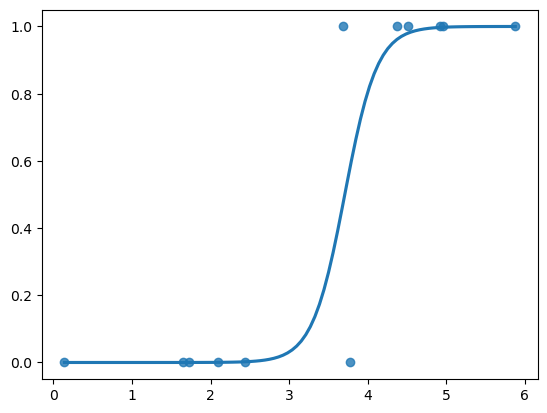

In [34]:
sns.regplot(x=X, y=y, logistic=True, ci=None)  #X in 1D
plt.show();
#X vs Predicted values.. > 3.5, y values rise from 0 to 1 

<Axes: >

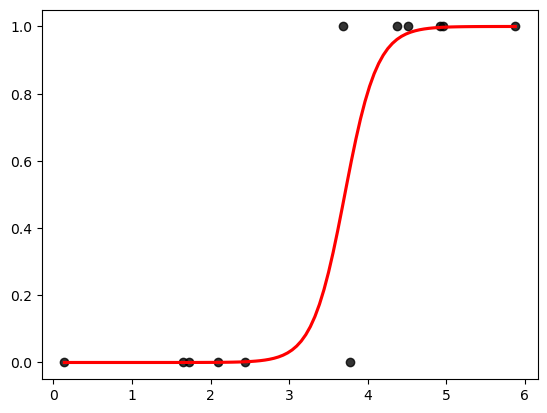

In [36]:
sns.regplot(x=X, y=y, logistic=True, ci=None, scatter_kws={'color':'black'}, line_kws={'color':'red'})

In [3]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [4]:
#predict if tumor be present in case X = 3.46
logr.predict(np.array([3.46]).reshape(-1,1))
#not cancerous

array([0])

In [5]:
#Coef
print(logr.coef_)
print(np.exp(logr.coef_))  # log-odds - expected change in log odds in outcome for unit change in X
# if size of tumor increases by 1 unit, chances of tumor increases by 4x.

[[1.39510954]]
[[4.03541657]]


In [6]:
logr.predict_proba(X)

array([[0.39250045, 0.60749955],
       [0.80731124, 0.19268876],
       [0.87224114, 0.12775886],
       [0.99044779, 0.00955221],
       [0.91961384, 0.08038616],
       [0.92654363, 0.07345637],
       [0.11637257, 0.88362743],
       [0.22098622, 0.77901378],
       [0.11075591, 0.88924409],
       [0.18706503, 0.81293497],
       [0.42280871, 0.57719129],
       [0.03335757, 0.96664243]])

In [7]:
logr.classes_

array([0, 1])

In [8]:
logr.predict(X)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [9]:
logr.score(X,y)
#ratio of no of correct predictions to no of observations

0.9166666666666666

In [10]:
pd.concat([pd.Series(y), pd.Series(logr.predict(X))], axis=1, keys=['Original', 'Predict'])

,Original,Predict
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [11]:
#confusion matrix - accuracy of model
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
cm= confusion_matrix(y, logr.predict(X))
print(cm)
#TN(5) FN(1)
#FP(0) TP(6)
(5 + 6)/(5+1+0+6)

[[5 1]
 [0 6]]


0.9166666666666666

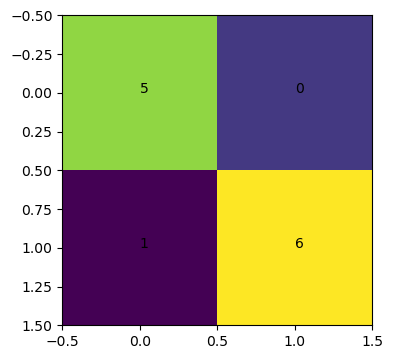

In [13]:
fig, ax = plt.subplots(figsize=(4,5))
ax.imshow(cm)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[i,j])
plt.show()

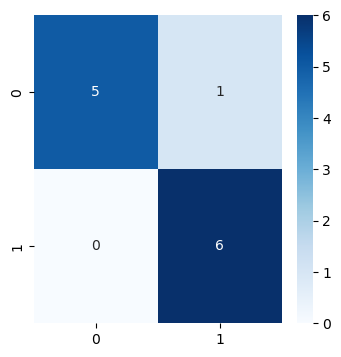

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [19]:
#classification report
classification_report(y, logr.predict(X), output_dict=True)

{'0': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6},
 '1': {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-score': 0.923076923076923,
  'support': 6},
 'accuracy': 0.9166666666666666,
 'macro avg': {'precision': 0.9285714285714286,
  'recall': 0.9166666666666667,
  'f1-score': 0.916083916083916,
  'support': 12},
 'weighted avg': {'precision': 0.9285714285714285,
  'recall': 0.9166666666666666,
  'f1-score': 0.9160839160839161,
  'support': 12}}

In [20]:
#Stats models
import statsmodels.api as sm

In [21]:
X = sm.add_constant(X)
X

array([[1.  , 3.78],
       [1.  , 2.44],
       [1.  , 2.09],
       [1.  , 0.14],
       [1.  , 1.72],
       [1.  , 1.65],
       [1.  , 4.92],
       [1.  , 4.37],
       [1.  , 4.96],
       [1.  , 4.52],
       [1.  , 3.69],
       [1.  , 5.88]])

In [24]:
logrSM = sm.Logit(y, X)
smResults = logrSM.fit()

Optimization terminated successfully.
         Current function value: 0.140603
         Iterations 11


In [25]:
smResults.params  #bo, b1

array([-17.97825137,   4.84653746])

In [26]:
smResults.predict(X)

array([5.84593754e-01, 2.12321158e-03, 3.89994410e-04, 3.06775060e-08,
       6.49253851e-05, 4.62471456e-05, 9.97175831e-01, 9.60876302e-01,
       9.97672370e-01, 9.80698797e-01, 4.76385544e-01, 9.99972993e-01])

In [27]:
(smResults.predict(X) >= .5).astype(int)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [28]:
smResults.pred_table()
#confusion matrix may different due to different methods of algo

array([[5., 1.],
       [1., 5.]])

In [29]:
smResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Mar 2024   Pseudo R-squ.:                  0.7972
Time:                        14:16:22   Log-Likelihood:                -1.6872
converged:                       True   LL-Null:                       -8.3178
Covariance Type:            nonrobust   LLR p-value:                 0.0002710
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.9783     19.733     -0.911      0.362     -56.654      20.698
x1             4.8465      5.169      0.938      0.348      -5.285      14.978
==============================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [30]:
smResults.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.797     
Date:               2024-03-06 14:16 AIC:              7.3745    
No. Observations:   12               BIC:              8.3443    
Df Model:           1                Log-Likelihood:   -1.6872   
Df Residuals:       10               LL-Null:          -8.3178   
Converged:          1.0000           LLR p-value:      0.00027098
No. Iterations:     11.0000          Scale:            1.0000    
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const   -17.9783    19.7331   -0.9111   0.3623   -56.6545   20.6980
x1        4.8465     5.1690    0.9376   0.3484    -5.2845   14.9776
=================================================================

"""